# Linear Regression
Modeling a linear relationship between a dependent variable and one or more independent variables.

## Advantages
1. Explainable method
2. Model coefficients are interpretable
3. Fast training speed

## Disadvantages
1. Assumes linearity (OLS assumption)
2. Sensitive to outliers

## Example

### Relevant Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm

### Scikit-Learn

In [31]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)

In [32]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [33]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [34]:
print(data.target_names)
print(data.feature_names)

['MedHouseVal']
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [35]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

reg = model.fit(X_train, y_train)

In [37]:
y_pred = reg.predict(X_test)

### Visualizing Predictions

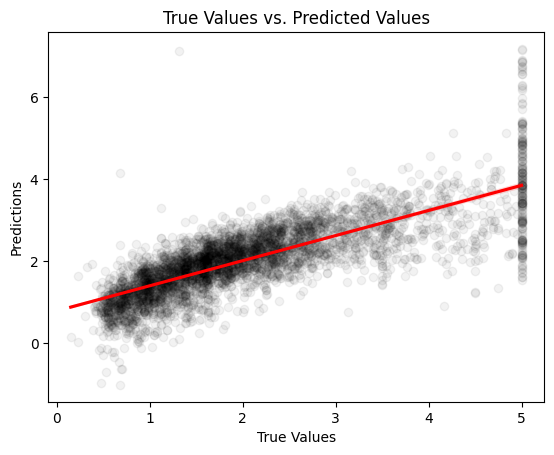

In [ ]:
sns.regplot(x=y_test, y=y_pred, color='black', line_kws={'color': 'red'}, scatter_kws={'alpha': 0.05})

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predicted Values')
plt.show()

In [41]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R-squared (R²):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared (R²): 0.6204500723362852
Root Mean Squared Error (RMSE): 0.7069444400281245


### Statsmodels Statistics

In [ ]:
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sun, 30 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:06:22   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.0